In [51]:
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import csv

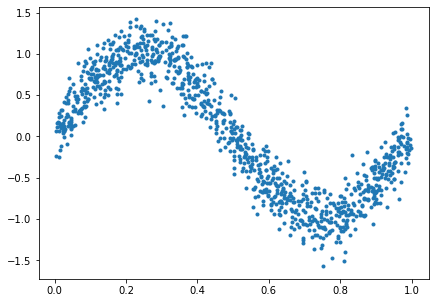

In [52]:
df = pd.read_csv('./poly_reg_p.csv', header=None)

x = df[0].to_numpy()
y = df[1].to_numpy()

X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)
fig = plt.figure(figsize=(7,5))
plt.plot(x, y,'.', label='Dados')

In [60]:

error_train = []
error_val = []
mean_vec = []
std_vec = []


include_bias = False



x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

for d in range(1, 20):

    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    

    polynomial_regression.fit(x_train, y_train)

    y_train_predict = polynomial_regression.predict(x_train)
    y_val_predict = polynomial_regression.predict(x_val)    
    error_train.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
    error_val.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))
    
    
print('tamanho conjunto de treinamento:', len(y_train))
print('tamanho conjunto de validação:', len(y_val))

tamanho conjunto de treinamento: 700
tamanho conjunto de validação: 300


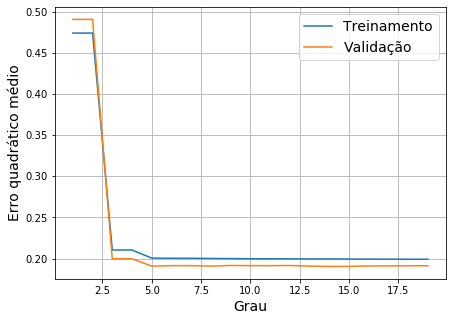

In [54]:
plt.figure(figsize=(7,5))
plt.plot(range(1, 20), error_train, label='Treinamento')
plt.plot(range(1, 20), error_val, label='Validação')
plt.xlabel('Grau',  fontsize=14)
plt.ylabel('Erro quadrático médio', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

plt.show()

# K-FOLD

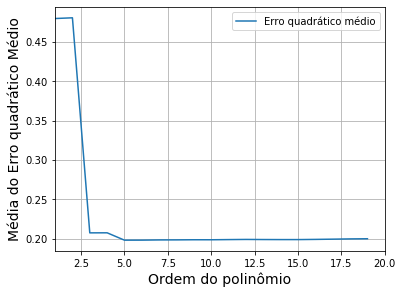

In [55]:

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

error_train = []
error_val = []
mean_vec = []
std_vec = []
for d in range(1, 20):
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, X, y, scoring='neg_mean_squared_error', cv=kfold)
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())
    

plt.figure(figsize=(13, 4.5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 20), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.xlim([1, 20])
plt.legend()
plt.grid()



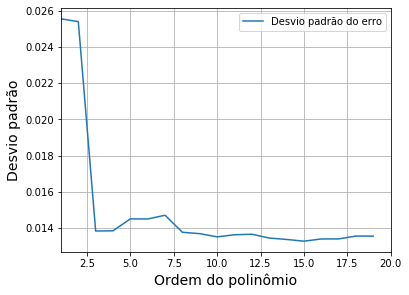

In [56]:

plt.figure(figsize=(13, 4.5))
ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 20), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xlim([1, 20])
plt.legend()
plt.grid()
plt.show()

#  Leave-p-out

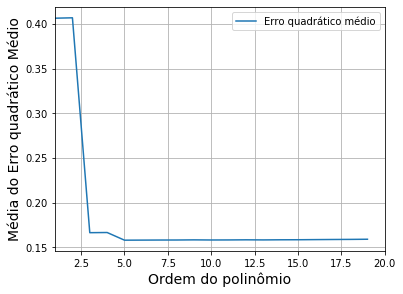

In [57]:

loocv = LeaveOneOut()

mean_vec = []
std_vec = []
for d in range(1, 20):
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, X, y, scoring='neg_mean_squared_error', cv=loocv)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())
    
   
    
plt.figure(figsize=(13, 4.5))
plt.title('AA')
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 20), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.xlim([1, 20])
plt.legend()
plt.grid()



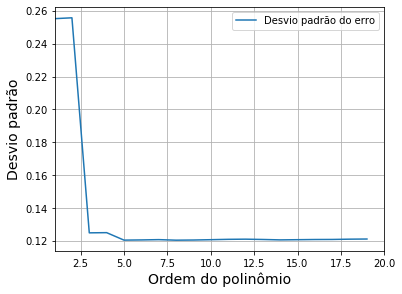

In [58]:
plt.figure(figsize=(13, 4.5))
ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 20), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xlim([1, 20])
plt.legend()
plt.grid()
plt.show()

# De acordo com as curvas mostradas nas figuras de aprendizado para polinomios com ordens de até 20, nota-se que a partir da ordem 5 apresenta um melhor resultado, apresentando menor erro quadrático médio. 

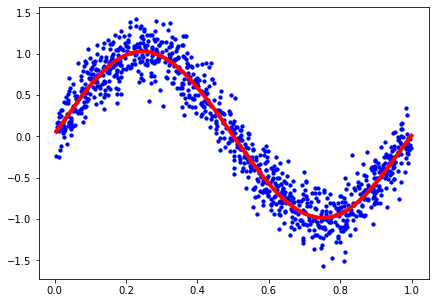

In [59]:
degree = 5

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

fig = plt.figure(figsize=(7,5))
plt.plot(x, y,'.', label='Dados')
plt.plot(X, y,'b.')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='red', linewidth = 4) 
plt.show()